Mutual Information Scores:
Curricular units 2nd sem (grade)    0.231076
Curricular units 1st sem (grade)    0.189976
Previous qualification (grade)      0.142939
Tuition fees up to date             0.124293
Admission grade                     0.089046
Scholarship holder                  0.060196
Age at enrollment                   0.038327
Daytime/evening attendance          0.009098
dtype: float64


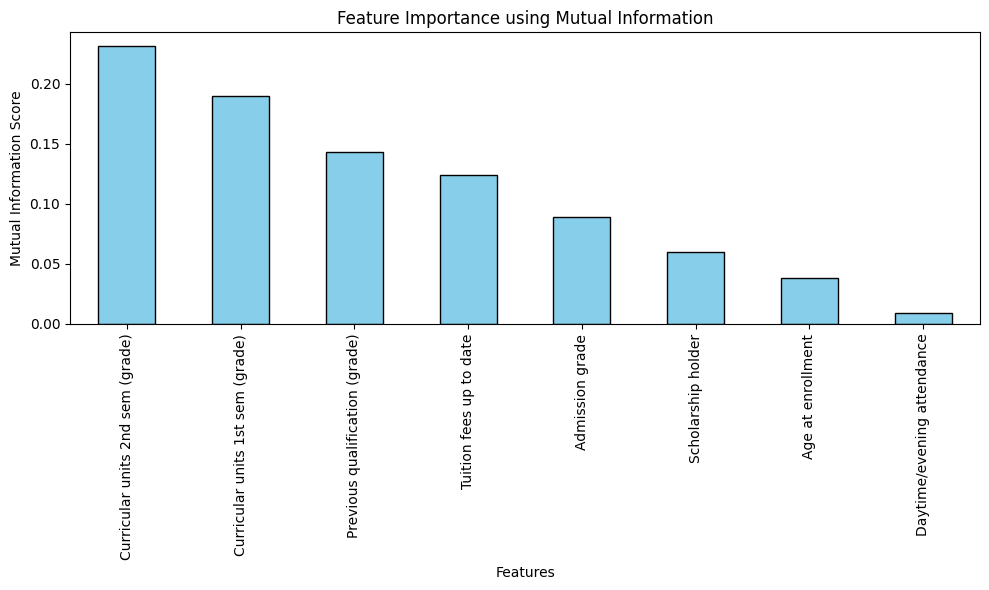

Random Forest Feature Importances:
Curricular units 2nd sem (grade)    0.277774
Curricular units 1st sem (grade)    0.178051
Tuition fees up to date             0.144794
Admission grade                     0.132718
Previous qualification (grade)      0.107520
Age at enrollment                   0.092205
Scholarship holder                  0.057016
Daytime/evening attendance          0.009922
dtype: float64


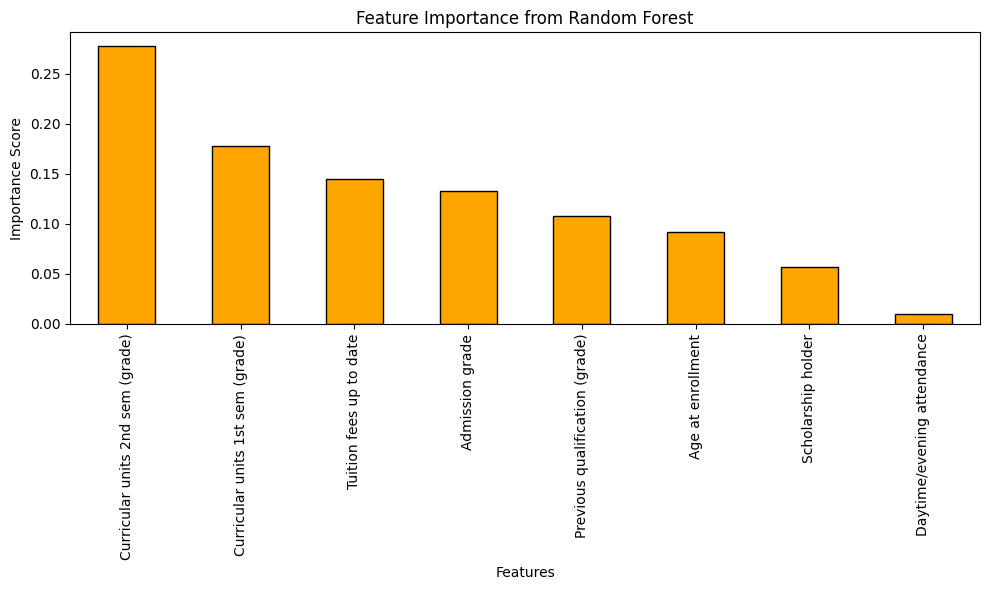

Current Working Directory: E:\nnnn


In [2]:
# ===== Step 1: Import Libraries =====
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# ===== Step 2: Load Dataset =====
file_path = "Dataset_2.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Ensure 'Target' column is binary (Dropout = 1, Graduate/Enrolled = 0)
data['Target'] = data['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Select relevant features (adjust based on dataset structure)
features = [
    'Daytime/evening attendance', 'Previous qualification (grade)', 'Admission grade',
    'Age at enrollment', 'Tuition fees up to date', 'Scholarship holder',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'
]
X = data[features]
y = data['Target']

# ===== Step 3: Handle Missing Values =====
# Impute missing values in numerical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns
imputer_num = SimpleImputer(strategy='median')
#X[numerical_cols] = imputer_num.fit_transform(X[numerical_cols])
X.loc[:, numerical_cols] = imputer_num.fit_transform(X[numerical_cols])


# ===== Step 4: Balance Dataset with SMOTE =====
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# ===== Step 5: Feature Selection with Mutual Information =====
mutual_info = mutual_info_classif(X_res, y_res)
mutual_info_series = pd.Series(mutual_info, index=features)
mutual_info_series.sort_values(ascending=False, inplace=True)

# Display and save Mutual Information Scores
print("Mutual Information Scores:")
print(mutual_info_series)
mutual_info_series.to_csv("updated/mutual_info_scores.csv", index=True)

# Plot feature importance from Mutual Information
plt.figure(figsize=(10, 6))
mutual_info_series.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Feature Importance using Mutual Information")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.tight_layout()
plt.savefig("updated/feature_importance_mutual_info.png")
plt.show()

# ===== Step 6: Feature Importance with Random Forest =====
clf = RandomForestClassifier(random_state=42)
clf.fit(X_res, y_res)

feature_importances = pd.Series(clf.feature_importances_, index=features)
feature_importances.sort_values(ascending=False, inplace=True)

# Display and save feature importances
print("Random Forest Feature Importances:")
print(feature_importances)
feature_importances.to_csv("updated/random_forest_importances.csv", index=True)

# Plot feature importances from Random Forest
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.savefig("updated/feature_importance_rf.png")
plt.show()


import os
print("Current Working Directory:", os.getcwd())


# Save Processed Features and Target
X_res.to_csv("processed_features.csv", index=False)
y_res.to_csv("processed_target.csv", index=False)
